In [2]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!pip install statsmodels scipy

In [4]:
# library
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.anova import anova_lm
from scipy.stats import pearsonr



In [5]:
# ==============================
# Load the CSV (adjust the path if necessary)
# ==============================
df = pd.read_csv("/content/drive/MyDrive/ProcesamientoImagenes/Treated_Sev.csv")

In [6]:
# ==============================
# Clean columns
# ==============================
df.columns = df.columns.str.strip()

In [7]:
# ==================================================================================================================================================================================================================
# Discard the columns that appear in the representations. Keep only the columns with treatment, dose, unit of measurement, surface area, application method, and average number of lesions.
# ==================================================================================================================================================================================================================
columnas_deseadas = [
    "TREATMENT",
    "DOSE",
    "UNIT OF MEASUREMENT",
    "SURFACE",
    "APPLICATION METHOD",
    "NUMBER OF REPETITION INJURIES 1",
    "NUMBER OF REPETITION INJURIES 2",
    "NUMBER OF REPETITION INJURIES 3",
    "AVERAGE SEVERITY"
]

df = df[columnas_deseadas]
#print(df.head())

# Mean ± error

In [8]:
#========================================================================================================================
# Remove the rows containing the words 'healthy'  since in those cases no dose or treatment was applied.
#========================================================================================================================
df = df[~df['SURFACE'].isin(['HEALTHY'])].reset_index(drop=True)

In [9]:
# ==============================
#Create a new DataFrame with the necessary columns
# ==============================
df_join = df.copy()

In [10]:
# ==============================
#Enter the dose with one decimal place.
# ==============================
df_join["DOSE"] = df_join["DOSE"].round(1)

In [11]:
# ==============================
# Create a new unified column
# ==============================
df_join["DOSE_APPLICATION"] = (
    df_join["TREATMENT"].astype(str) + " " +
    df_join["DOSE"].astype(str) + " " +
    df_join["UNIT OF MEASUREMENT"].astype(str) + " " +
    df_join["SURFACE"].astype(str) + " " +
    df_join["APPLICATION METHOD"].astype(str)
)

In [12]:
# ==============================
# Show the first values ​​to verify
# ==============================
print(df_join.head())

  TREATMENT  DOSE UNIT OF MEASUREMENT             SURFACE APPLICATION METHOD  \
0      SOAP   5.0                  ML  GREENHOUSE PLASTIC           SPRAYING   
1      SOAP   5.0                  ML      PRUNING SHEARS           SPRAYING   
2      SOAP   5.0                  ML      PRUNING SHEARS            DIPPING   
3      SOAP   7.5                  ML  GREENHOUSE PLASTIC           SPRAYING   
4      SOAP   7.5                  ML      PRUNING SHEARS           SPRAYING   

   NUMBER OF REPETITION INJURIES 1  NUMBER OF REPETITION INJURIES 2  \
0                         0.040825                         1.600858   
1                         0.000000                         0.068710   
2                         0.279598                         0.000000   
3                         0.285884                         0.000000   
4                         0.179469                         0.260626   

   NUMBER OF REPETITION INJURIES 3  AVERAGE SEVERITY  \
0                         0.412439  

In [13]:
# ============================================================
# Calcular la media y error estándar a partir de las tres repeticiones
# ============================================================
# Create a column with the average of the three repetitions.
df_join["MEAN_SEVERITY"] = df_join[[
    "NUMBER OF REPETITION INJURIES 1",
    "NUMBER OF REPETITION INJURIES 2",
    "NUMBER OF REPETITION INJURIES 3"
]].mean(axis=1)



In [14]:
# Crear columna con la desviación estándar por fila
df_join["SD_SEVERITY"] = df_join[[
    "NUMBER OF REPETITION INJURIES 1",
    "NUMBER OF REPETITION INJURIES 2",
    "NUMBER OF REPETITION INJURIES 3"
]].std(axis=1)

In [15]:
# ==============================
# Calculate statistics per dose
# ==============================
resumen = df_join.groupby(["TREATMENT", "DOSE_APPLICATION"])["MEAN_SEVERITY"].agg(
    media="mean",
    desviacion="std",
    n="count"
).reset_index()

In [16]:
# ==============================
# Calculate the standard error of the mean (SEM)
# ==============================
resumen["error"] = resumen["desviacion"] / np.sqrt(resumen["n"])

In [17]:
# ==============================
# Create columns with the formats "mean ± deviation" and "mean ± error"
# ==============================
resumen["Media ± SD"] = resumen["media"].round(2).astype(str) + " ± " + resumen["desviacion"].round(2).astype(str)
resumen["Media ± Error"] = resumen["media"].round(2).astype(str) + " ± " + resumen["error"].round(2).astype(str)


In [18]:
# Show the result
print("=== RESULTADOS: Media ± Desviación Estándar y Media ± Error ===")
print(resumen[["DOSE_APPLICATION", "Media ± SD", "Media ± Error"]])

=== RESULTADOS: Media ± Desviación Estándar y Media ± Error ===
                                     DOSE_APPLICATION  Media ± SD  \
0               GLUTARALDEHYDE 0.0 ppm POSITIVE WATER  5.41 ± nan   
1   GLUTARALDEHYDE 1000.0 ppm GREENHOUSE PLASTIC S...  0.58 ± nan   
2    GLUTARALDEHYDE 1000.0 ppm PRUNING SHEARS DIPPING   0.6 ± nan   
3   GLUTARALDEHYDE 1000.0 ppm PRUNING SHEARS SPRAYING  0.38 ± nan   
4   GLUTARALDEHYDE 1500.0 ppm GREENHOUSE PLASTIC S...   0.7 ± nan   
..                                                ...         ...   
78                 SOAP 5.0 ML PRUNING SHEARS DIPPING  0.29 ± nan   
79                SOAP 5.0 ML PRUNING SHEARS SPRAYING   0.1 ± nan   
80            SOAP 7.5 ML GREENHOUSE PLASTIC SPRAYING  0.15 ± nan   
81                 SOAP 7.5 ML PRUNING SHEARS DIPPING  0.77 ± nan   
82                SOAP 7.5 ML PRUNING SHEARS SPRAYING  0.25 ± nan   

   Media ± Error  
0     5.41 ± nan  
1     0.58 ± nan  
2      0.6 ± nan  
3     0.38 ± nan  
4      0.7 ±

In [19]:
# ==============================
# Save the complete results to a file.
# ==============================
ruta_salida = "/content/drive/MyDrive/ProcesamientoImagenes/Resultados_completos_severidad.csv"
resumen.to_csv(ruta_salida, index=False, encoding='utf-8-sig')
print(f"\nArchivo guardado en: {ruta_salida}")



Archivo guardado en: /content/drive/MyDrive/ProcesamientoImagenes/Resultados_completos_severidad.csv


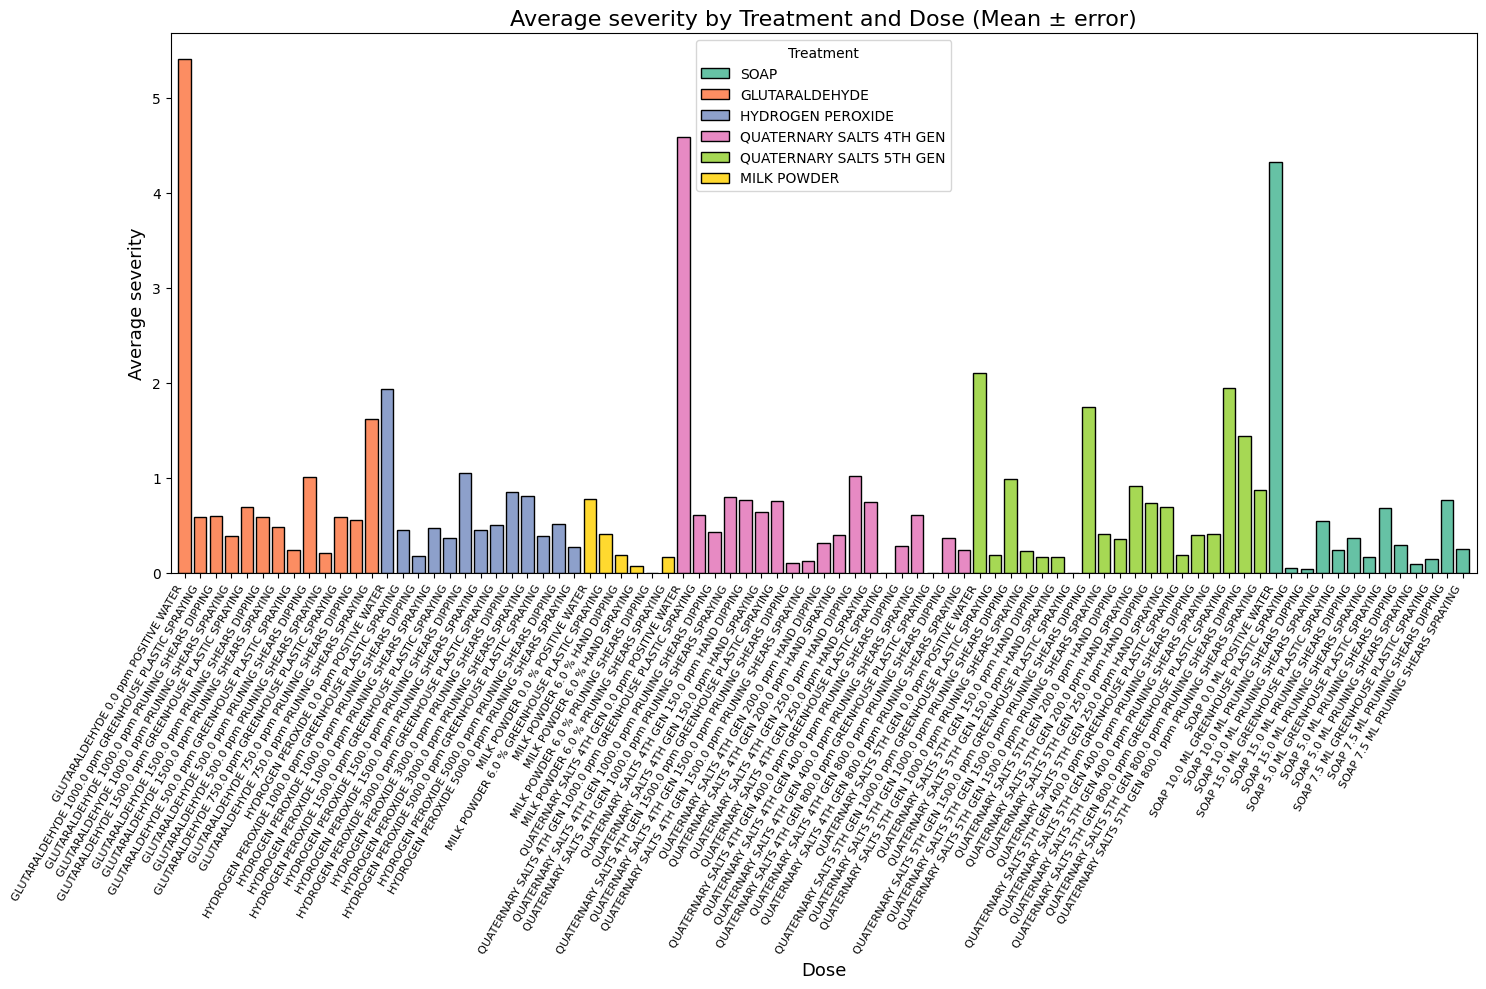

In [20]:
# ===========================================================
# Create a color palette by treatment
# ===========================================================
tratamientos = df_join["TREATMENT"].unique()
palette = sns.color_palette("Set2", len(tratamientos))
color_dict = dict(zip(tratamientos, palette))

# Assign the corresponding color to each bar in the summary
resumen["color"] = resumen["TREATMENT"].map(color_dict)

# ===========================================================
# Graph bars: Mean ± Standard error
# ===========================================================
plt.figure(figsize=(15, 10))

plt.bar(
    resumen["DOSE_APPLICATION"],
    resumen["media"],
    yerr=resumen["error"],
    capsize=5,
    color=resumen["color"],
    edgecolor='black'
)

# ===========================================================
# Chart customization
# ===========================================================
plt.title("Average severity by Treatment and Dose (Mean ± error)", fontsize=16)
plt.xlabel("Dose", fontsize=13)
plt.ylabel("Average severity", fontsize=13)
plt.xticks(rotation=60, ha='right', fontsize=8)


# Remove grid from chart
plt.grid(False)

# Reduce empty space at the ends (adjust X-axis limits)
plt.xlim(-0.9, len(resumen["DOSE_APPLICATION"]) - 0.1)

# ===========================================================
# Color legend by treatment
# ===========================================================
handles = [plt.Rectangle((0, 0), 1, 1, color=color_dict[t], ec="black") for t in tratamientos]
plt.legend(handles, tratamientos, title="Treatment", loc='upper center')

plt.tight_layout()
plt.savefig("/content/drive/MyDrive/ProcesamientoImagenes/Barras_desviacion_dosis_media_Severidad.tiff", dpi=300, format="tiff",bbox_inches='tight', pad_inches=0.01)
plt.show()



# ANOVA + Tukey HSD for  dose

In [21]:
#========================================================================================================================
# Remove the rows containing the words 'sana' and 'positiva', since in those cases no dose or treatment was applied.
#========================================================================================================================
df = df[~df['SURFACE'].isin(['HEALTHY', 'POSITIVE'])].reset_index(drop=True)

#========================================================================================================================
# Remove specific rows because they have leaves damaged by phytotoxicity
#========================================================================================================================

df = df[~(
    (df['TREATMENT'] == 'QUATERNARY SALTS 4TH GEN') &
    (df['DOSE'].isin([400, 800])) &
    (df['UNIT OF MEASUREMENT'] == 'ppm') &
    (df['SURFACE'] == 'GREENHOUSE PLASTIC') &
    (df['APPLICATION METHOD'] == 'SPRAYING')
)]



In [22]:
# =======================
# Normality test (Shapiro-Wilk) by group
# =======================
def verificar_normalidad(df, columna):
    print(f"\n=== NORMALITY VERIFICATION (Shapiro-Wilk) for '{columna}' ===")
    resultados_normalidad = {}
    for grupo, datos in df.groupby("TREATMENT")[columna]:
        datos = datos.dropna().replace([np.inf, -np.inf], np.nan).dropna()
        if len(datos) < 3:
            print(f"TREATMENT {grupo}: there is not enough data for the test (n={len(datos)})")
            resultados_normalidad[grupo] = None
            continue
        stat, p = stats.shapiro(datos)
        cumple_normalidad = p > 0.05
        resultados_normalidad[grupo] = cumple_normalidad
        print(f"TREATMENT {grupo}: W={stat:.4f}, p={p:.4f} -> {'Normal' if cumple_normalidad else 'Not normal'}")
    return resultados_normalidad

In [23]:
# =======================
# Test of homogeneity of variances
# =======================
def verificar_homogeneidad_levene(df, columna):
    print(f"\n=== Levene's test for homogeneity of variances'{columna}' ===")

    # Create a list of groups by treatment
    grupos = [valores[columna].dropna().values for _, valores in df.groupby("TREATMENT")]

    # Run Levene's test
    stat_levene, p_levene = stats.levene(*grupos)

    # Interpretation
    homogeneas = p_levene > 0.05
    print(f"Statistical = {stat_levene:.4f}, p-value = {p_levene:.4f} -> {'Homogeneous' if homogeneas else 'Not Homogeneous'}")
    return homogeneas

In [24]:
def anova_tukey(df, columna):
    print(f"\n=== ANOVA + TUKEY HSD applied to '{columna}' ===")

    # ==============================
    # One-way ANOVA
    # ==============================
    modelo = ols(f"{columna} ~ C(TREATMENT) + C(DOSE)", data=df).fit()
    anova_resultados = sm.stats.anova_lm(modelo, typ=2)
    print("\n--- Results ANOVA ---")
    print(anova_resultados)

    # ==============================
    #Tukey HSD test
    # ==============================
    tukey = pairwise_tukeyhsd(df[columna], groups=df["TREATMENT"],alpha=0.05)
    print("\n--- TUKEY HSD TEST ---")
    print(tukey.summary())

    return anova_resultados, tukey

In [25]:
# ==============================
# Evaluate whether it meets the conditions for ANOVA
# ==============================
#Evaluate normality and homogeneity, apply transformations if necessary, and perform ANOVA + Tukey HSD when the assumptions are met.

print("=== START OF THE ANALYSIS ===")

# Step 1. Evaluate original data
normalidad = verificar_normalidad(df, 'AVERAGE SEVERITY')
homogeneidad = verificar_homogeneidad_levene(df, 'AVERAGE SEVERITY')
normales = all(v for v in normalidad.values() if v is not None)
if normales and homogeneidad:
  print("\nThe original data meet the assumptions. ANOVA + Tukey HSD is applied.")


# Step 2. Apply logarithmic transformation
else:
    print("\nThe data do NOT meet the assumptions (normality and homogeneity of variances) of ANOVA.")
    print("Logarithmic or square root transformation will be applied to stabilize variances and improve normality.")

    print("Applying LOGARITHMIC transformation...")
    #Remove columns with 0 in the average
    df = df[df["AVERAGE SEVERITY"] != 0]
    # Avoid zero or negative logs and apply the transformation
    df['TRANSFORMED'] = np.log(df["AVERAGE SEVERITY"].replace(0, np.nan).dropna())
    normalidad = verificar_normalidad(df, 'TRANSFORMED')
    homogeneidad = verificar_homogeneidad_levene(df, 'TRANSFORMED')

    normales = all(v for v in normalidad.values() if v is not None)
    if normales and homogeneidad:
        print("\nThe log-transformed data meet the assumptions. ANOVA + Tukey HSD is applied.")



=== START OF THE ANALYSIS ===

=== NORMALITY VERIFICATION (Shapiro-Wilk) for 'AVERAGE SEVERITY' ===
TREATMENT GLUTARALDEHYDE: W=0.8141, p=0.0136 -> Not normal
TREATMENT HYDROGEN PEROXIDE: W=0.9325, p=0.4075 -> Normal
TREATMENT MILK POWDER: W=0.9273, p=0.5779 -> Normal
TREATMENT QUATERNARY SALTS 4TH GEN: W=0.9560, p=0.5908 -> Normal
TREATMENT QUATERNARY SALTS 5TH GEN: W=0.8717, p=0.0190 -> Not normal
TREATMENT SOAP: W=0.9089, p=0.2068 -> Normal

=== Levene's test for homogeneity of variances'AVERAGE SEVERITY' ===
Statistical = 1.9277, p-value = 0.1008 -> Homogeneous

The data do NOT meet the assumptions (normality and homogeneity of variances) of ANOVA.
Logarithmic or square root transformation will be applied to stabilize variances and improve normality.
Applying LOGARITHMIC transformation...

=== NORMALITY VERIFICATION (Shapiro-Wilk) for 'TRANSFORMED' ===
TREATMENT GLUTARALDEHYDE: W=0.9378, p=0.4698 -> Normal
TREATMENT HYDROGEN PEROXIDE: W=0.9608, p=0.7945 -> Normal
TREATMENT MILK POW

In [26]:
resultadoAnova, resultadoTukey = anova_tukey(df, 'TRANSFORMED')



=== ANOVA + TUKEY HSD applied to 'TRANSFORMED' ===

--- Results ANOVA ---
                 sum_sq    df         F    PR(>F)
C(TREATMENT)   6.123289   5.0  2.310255  0.056550
C(DOSE)       11.663429  15.0  1.466831  0.151402
Residual      28.625204  54.0       NaN       NaN

--- TUKEY HSD TEST ---
                  Multiple Comparison of Means - Tukey HSD, FWER=0.05                   
         group1                   group2          meandiff p-adj   lower   upper  reject
----------------------------------------------------------------------------------------
          GLUTARALDEHYDE        HYDROGEN PEROXIDE   -0.111  0.999 -0.9877  0.7656  False
          GLUTARALDEHYDE              MILK POWDER  -1.1742 0.0735 -2.4139  0.0656  False
          GLUTARALDEHYDE QUATERNARY SALTS 4TH GEN  -0.2331 0.9601 -1.0531  0.5869  False
          GLUTARALDEHYDE QUATERNARY SALTS 5TH GEN  -0.0685 0.9999 -0.8782  0.7411  False
          GLUTARALDEHYDE                     SOAP  -0.9025   0.04 -1.7791 -0.0

In [27]:
# ==============================
# Determine the best and worst doses per treatment
# ==============================
promedios = df.groupby(["TREATMENT", "DOSE","SURFACE", "APPLICATION METHOD","AVERAGE SEVERITY"])["TRANSFORMED"].mean().reset_index()

# Identify best (minimum) and worst (maximum)
mejores = promedios.loc[promedios.groupby("TREATMENT")["TRANSFORMED"].idxmin()].round(2) #Round the DOSE and AVERAGE INJURIES columns to 2 decimal places
peores = promedios.loc[promedios.groupby("TREATMENT")["TRANSFORMED"].idxmax()].round(2) #Round the DOSE and AVERAGE INJURIES columns to 2 decimal places

print("\nBetter doses per treatment (lower average number of severity):")
print(mejores)
print("\nWorst doses per treatment (highest average number of severity):")
print(peores)


Better doses per treatment (lower average number of severity):
                   TREATMENT    DOSE         SURFACE APPLICATION METHOD  \
2             GLUTARALDEHYDE   500.0  PRUNING SHEARS           SPRAYING   
13         HYDROGEN PEROXIDE  1000.0  PRUNING SHEARS            DIPPING   
26               MILK POWDER     6.0            HAND           SPRAYING   
42  QUATERNARY SALTS 4TH GEN  1500.0  PRUNING SHEARS            DIPPING   
44  QUATERNARY SALTS 5TH GEN   150.0            HAND            DIPPING   
68                      SOAP    10.0  PRUNING SHEARS            DIPPING   

    AVERAGE SEVERITY  TRANSFORMED  
2               0.20        -1.59  
13              0.18        -1.73  
26              0.07        -2.71  
42              0.10        -2.26  
44              0.16        -1.83  
68              0.04        -3.19  

Worst doses per treatment (highest average number of severity):
                   TREATMENT    DOSE             SURFACE APPLICATION METHOD  \
5             

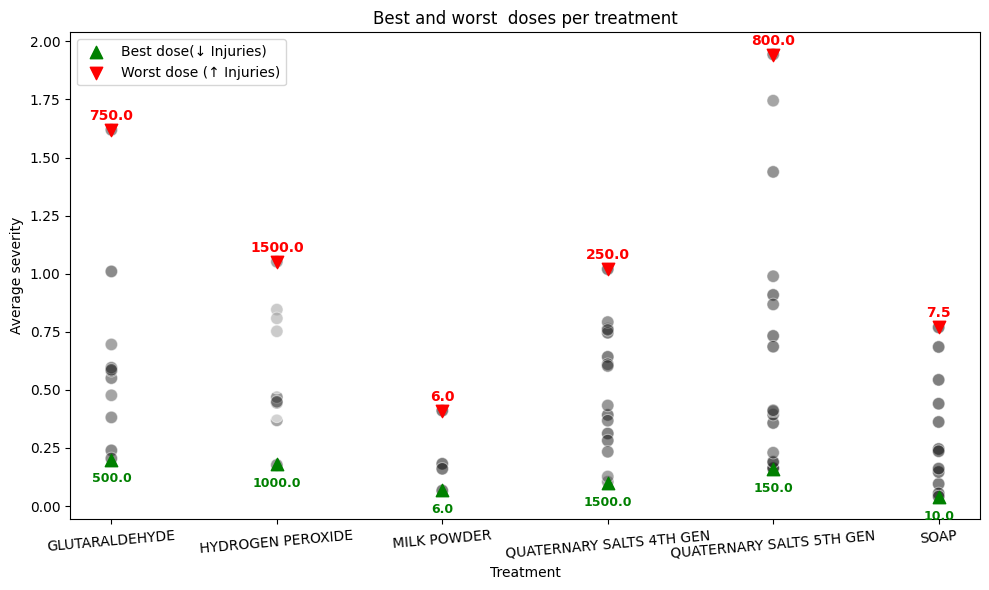

In [28]:
# ==============================
# Graph of best and worst doses on a logarithmic scale
# ==============================
plt.figure(figsize=(10, 6))

# Plot all baseline points
sns.scatterplot(data=promedios, x="TREATMENT", y="AVERAGE SEVERITY",
                hue="DOSE", palette="gray", s=80, alpha=0.5, legend=False)

#Graph best (green) and worst (red)
plt.scatter(mejores["TREATMENT"], mejores["AVERAGE SEVERITY"],
            color="green", s=80, marker="^", label="Best dose(↓ Injuries)")
plt.scatter(peores["TREATMENT"], peores["AVERAGE SEVERITY"],
            color="red", s=80, marker="v", label="Worst dose (↑ Injuries)")

# Add tags
for _, fila in mejores.iterrows():
    plt.text(fila["TREATMENT"], fila["AVERAGE SEVERITY"] - 0.055, f"{fila['DOSE']}",
             color="green", ha='center', va='top', fontsize=9, fontweight='bold')
for _, fila in peores.iterrows():
    plt.text(fila["TREATMENT"], fila["AVERAGE SEVERITY"] + 0.03, f"{fila['DOSE']}",
             color="red", ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.title("Best and worst  doses per treatment")
plt.ylabel("Average severity")
plt.xlabel("Treatment")
plt.legend()
plt.xticks(rotation=5)
plt.tight_layout()
plt.savefig("/content/drive/MyDrive/ProcesamientoImagenes/ANOVA_TukeyHSD_Lesions_Dose_Treatment_Severidad.tiff", dpi=500, format="tiff")
plt.show()

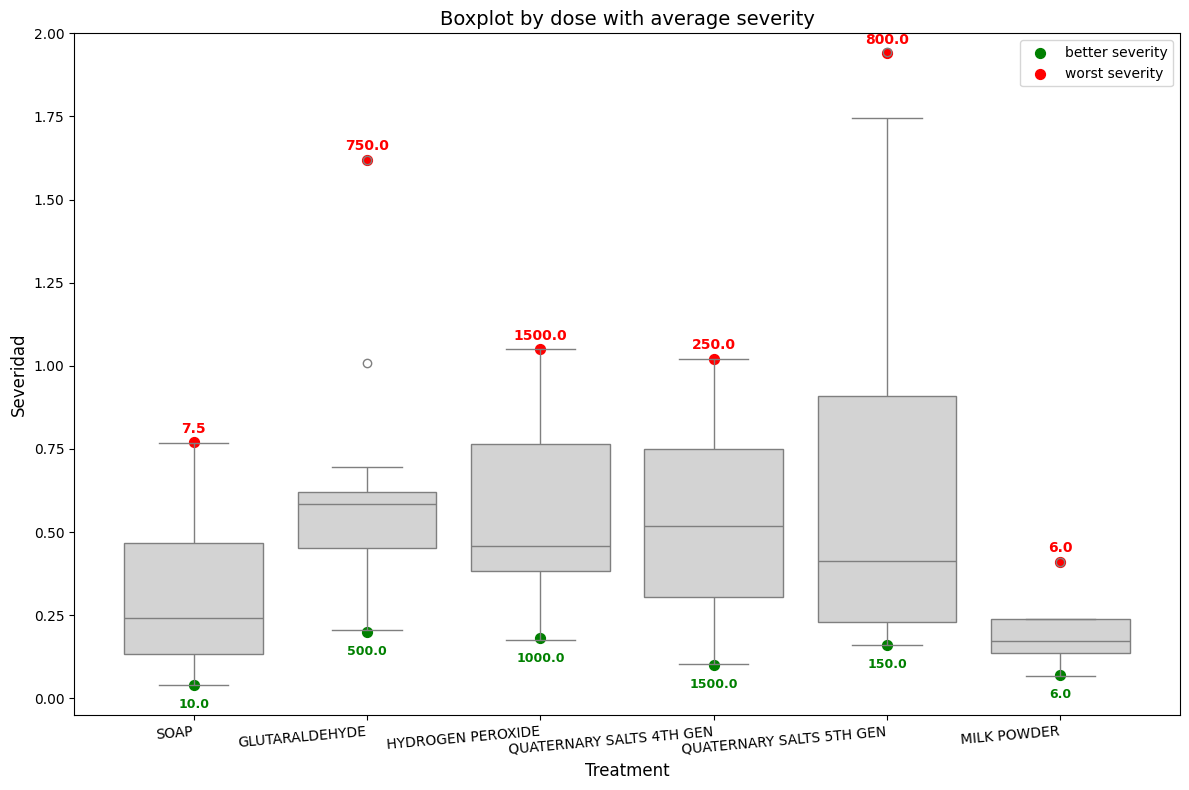

In [29]:
plt.figure(figsize=(12, 8))

# --- Boxplot ---
sns.boxplot(
    data=df,
    x="TREATMENT",
    y="AVERAGE SEVERITY",
    color="lightgray"
)


# Y-axis limits (adjust to your needs)
plt.ylim(-0.05, 2)

plt.xticks(rotation=5, ha='right')
plt.xlabel("Treatment", fontsize=12)
plt.ylabel("Severidad", fontsize=12)
plt.title("Boxplot by dose with average severity", fontsize=14)

# Add tags
for _, fila in mejores.iterrows():
    plt.text(fila["TREATMENT"], fila["AVERAGE SEVERITY"] - 0.04, f"{fila['DOSE']}",
             color="green", ha='center', va='top', fontsize=9, fontweight='bold')
for _, fila in peores.iterrows():
    plt.text(fila["TREATMENT"], fila["AVERAGE SEVERITY"] + 0.02, f"{fila['DOSE']}",
             color="red", ha='center', va='bottom', fontsize=10, fontweight='bold')

"""
# Añadir puntos individuales
sns.stripplot(
    data=df,
    x="TREATMENT",
    y="AVERAGE SEVERITY",
    color="black",
    size=5,
    jitter=True
)
"""
# Green dot (better)
plt.scatter(
    mejores["TREATMENT"],
    mejores["AVERAGE SEVERITY"],
    color="green",
    s=50,
    label="better severity"
)

# Red dot (worst)
plt.scatter(
    peores["TREATMENT"],
    peores["AVERAGE SEVERITY"],
    color="red",
    s=50,
    label="worst severity"
)


plt.legend()
plt.tight_layout()
plt.savefig("/content/drive/MyDrive/ProcesamientoImagenes/ANOVA_TukeyHSD_Lesions_Dose_Treatment_Severidad_boxplot.tiff", dpi=500, format="tiff")
plt.show()

# Correlation between dose and average severity

In [30]:
print(df.head())

  TREATMENT  DOSE UNIT OF MEASUREMENT             SURFACE APPLICATION METHOD  \
0      SOAP   5.0                  ML  GREENHOUSE PLASTIC           SPRAYING   
1      SOAP   5.0                  ML      PRUNING SHEARS           SPRAYING   
2      SOAP   5.0                  ML      PRUNING SHEARS            DIPPING   
3      SOAP   7.5                  ML  GREENHOUSE PLASTIC           SPRAYING   
4      SOAP   7.5                  ML      PRUNING SHEARS           SPRAYING   

   NUMBER OF REPETITION INJURIES 1  NUMBER OF REPETITION INJURIES 2  \
0                         0.040825                         1.600858   
1                         0.000000                         0.068710   
2                         0.279598                         0.000000   
3                         0.285884                         0.000000   
4                         0.179469                         0.260626   

   NUMBER OF REPETITION INJURIES 3  AVERAGE SEVERITY  TRANSFORMED  
0                       

In [31]:
#========================================================================================================================
# Remove the rows containing the words 'sana' and 'positiva', since in those cases no dose or treatment was applied.
#========================================================================================================================
df = df[~df['SURFACE'].isin(['HEALTHY', 'POSITIVE'])].reset_index(drop=True)


In [32]:
# ==============================
#Create a new DataFrame with the necessary columns
# ==============================
df_Pearson = df.copy()

In [33]:
# ==============================
#Enter the dose with one decimal place.
# ==============================
df_Pearson["DOSE"] = df_Pearson["DOSE"].round(1)

In [34]:
#==========================================
# Remove rows with null values ​​in DOSE or AVERAGE LESIONS o TRANSFORMED
#==========================================
df_Pearson = df_Pearson.dropna(subset=["DOSE", "AVERAGE SEVERITY","TRANSFORMED"])

In [35]:
#==========================================
# Calculate the Pearson correlation
#==========================================
# Calculate Spearman correlation and p-value
from scipy.stats import spearmanr
correlacion, p_value = spearmanr(df_Pearson['DOSE'], df_Pearson['AVERAGE SEVERITY'])
print(f"\nCorrelation between dose and average number of injuries: {correlacion:.3f}")
print(f"Value p: {p_value:.3f}")


Correlation between dose and average number of injuries: 0.311
Value p: 0.007


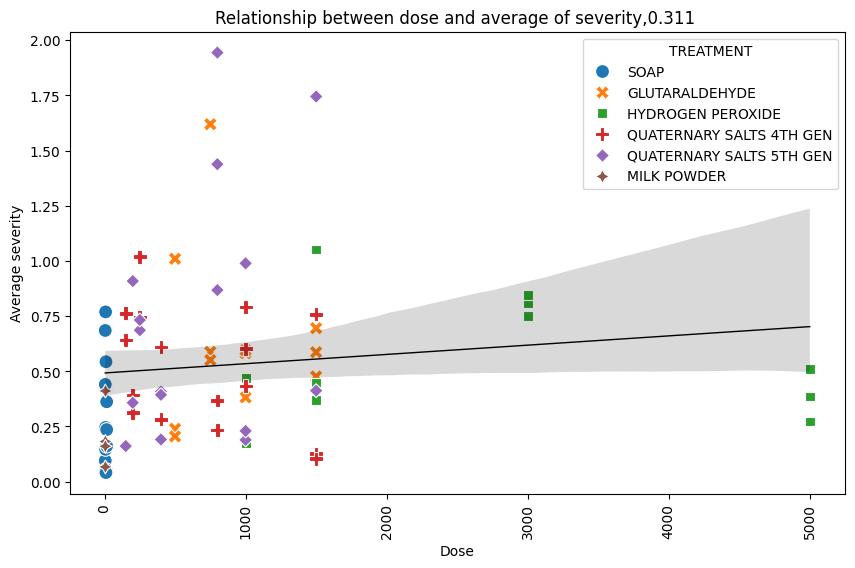

In [45]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='DOSE', y='AVERAGE SEVERITY', hue='TREATMENT', style='TREATMENT', s=100)
sns.regplot(data=df, x='DOSE', y='AVERAGE SEVERITY', scatter=False, color='black', line_kws={"linewidth":1})
plt.title(f"Relationship between dose and average of severity,{correlacion:.3f} ")
plt.xlabel("Dose")
plt.ylabel("Average severity")
plt.legend(title="TREATMENT")
plt.xticks(rotation=90)
plt.savefig("/content/drive/MyDrive/ProcesamientoImagenes/relacionDosisPromedio_Severidad.tiff", dpi=300, format="tiff",bbox_inches='tight', pad_inches=0.01)
plt.show()

# Spearman correlation between number of lesions and severity

In [37]:
# ==========================================================
#  Load the CSV (adjust the path if necessary)
# ==========================================================
df1 = pd.read_csv("/content/drive/MyDrive/ProcesamientoImagenes/Injuries_Severity.csv", sep='\t')
print(df1.head())

  TREATMENT  DOSE UNIT OF MEASUREMENT             SURFACE APPLICATION METHOD  \
0      SOAP   0.0                  ML             HEALTHY                  0   
1      SOAP   5.0                  ML  GREENHOUSE PLASTIC           SPRAYING   
2      SOAP   5.0                  ML      PRUNING SHEARS           SPRAYING   
3      SOAP   5.0                  ML      PRUNING SHEARS            DIPPING   
4      SOAP   7.5                  ML  GREENHOUSE PLASTIC           SPRAYING   

   AVERAGE INJURIES  AVERAGE SEVERITY  
0             0.000          0.000000  
1             1.333          0.684707  
2             2.000          0.095408  
3            10.000          0.440403  
4             1.000          0.146377  


In [38]:
# ==============================
# Clean columns
# ==============================
df1.columns = df1.columns.str.strip()

In [39]:
#========================================================================================================================
# Remove the rows containing the words 'sana' and 'positiva', since in those cases no dose or treatment was applied.
#========================================================================================================================
df1 = df1[~df1['SURFACE'].isin(['HEALTHY', 'POSITIVE'])].reset_index(drop=True)

In [40]:
# ==========================================================
# CALCULATE SPEARMAN CORRELATION
# ==========================================================
corr, pvalue = spearmanr(df1["AVERAGE INJURIES"], df1["AVERAGE SEVERITY"])

print("Spearman's rank correlation:", corr)
print("Value p:", pvalue)

Spearman's rank correlation: 0.5955401781661156
Value p: 1.1096529917226732e-08


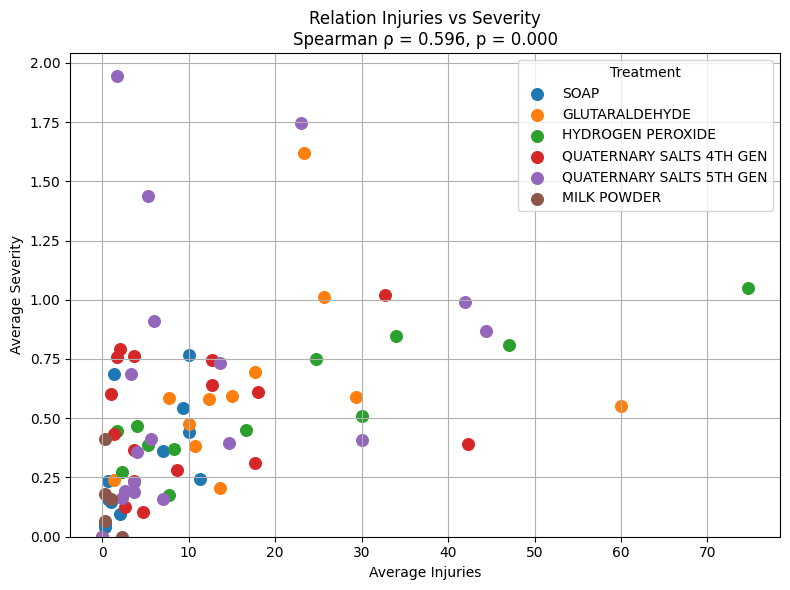

In [41]:
# ============================================
# Create Spearman's rank correlation coefficient
# ============================================

plt.figure(figsize=(8,6))

tratamientos = df1["TREATMENT"].unique()
colores = plt.cm.tab10(range(len(tratamientos)))  #


for tratamiento, color in zip(tratamientos, colores):
    subset = df1[df1["TREATMENT"] == tratamiento]
    plt.scatter(subset["AVERAGE INJURIES"],
                subset["AVERAGE SEVERITY"],
                label=tratamiento,
                s=70,
                color=color)

# Title
plt.title(f"Relation Injuries vs Severity\nSpearman ρ = {corr:.3f}, p = {pvalue:.3f}")

plt.xlabel("Average Injuries")
plt.ylabel("Average Severity")

plt.ylim(bottom=0)

plt.grid(True)
plt.legend(title="Treatment")
plt.tight_layout()
plt.show()


In [42]:
# ============================================
# 4. Ajustar recta OLS
# ============================================
coef = np.polyfit(df1["AVERAGE INJURIES"], df1["AVERAGE SEVERITY"], 1)
poly = np.poly1d(coef)
x_linea = np.linspace(df1["AVERAGE INJURIES"].min(), df1["AVERAGE INJURIES"].max(), 100)
y_linea = poly(x_linea)


In [43]:
# ============================================
# Colors by treatment
# ============================================
tratamientos = df1["TREATMENT"].unique()
colormap = plt.cm.get_cmap("tab20", len(tratamientos))
color_dict = {t: colormap(i) for i, t in enumerate(tratamientos)}

/tmp/ipython-input-2772597775.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = plt.cm.get_cmap("tab20", len(tratamientos))


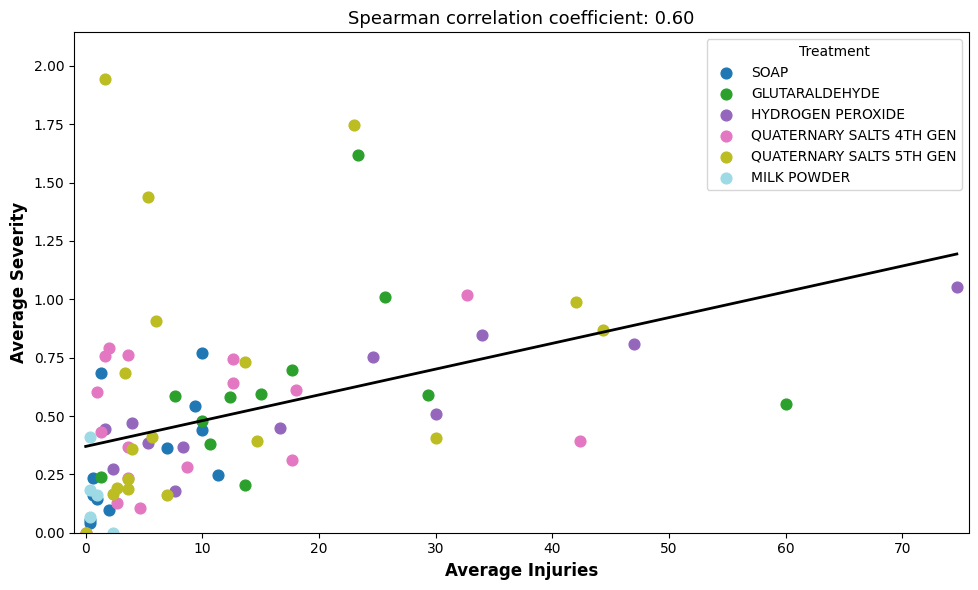

In [44]:
# ============================================
# Create Spearman's rank correlation coefficient
# ============================================
plt.figure(figsize=(10,6))

# Colored dots
for t in tratamientos:
    datos_t = df1[df1["TREATMENT"] == t]
    plt.scatter(
        datos_t["AVERAGE INJURIES"],
        datos_t["AVERAGE SEVERITY"],
        s=60,
        color=color_dict[t],
        label=t
    )

#Trend line
plt.plot(x_linea, y_linea, color="black", linewidth=2)

# Coefficient text
plt.title(f"Spearman correlation coefficient: {corr:.2f}", fontsize=13)

#Axes
plt.xlabel("Average Injuries", fontsize=12, fontweight="bold")
plt.ylabel("Average Severity", fontsize=12, fontweight="bold")

plt.ylim(0, df1["AVERAGE SEVERITY"].max() + 0.2)
plt.xlim(df1["AVERAGE INJURIES"].min() - 1, df1["AVERAGE INJURIES"].max() + 1)

plt.legend(title="Treatment", bbox_to_anchor=(0.85, 1), loc="upper center")
plt.grid(False)
plt.tight_layout()
plt.savefig("/content/drive/MyDrive/ProcesamientoImagenes/CorrelacionSpearmaPromedioLasion_Severidad.tiff", dpi=300, format="tiff",bbox_inches='tight', pad_inches=0.01)
plt.show()